# Trabajo Especial - Modelos y Simulación 2025
### Lucas Nieto y Alvaro Santiago Medina
---

# 🎯 Objetivo 📌
Estudiar distintos métodos de generación de números pseudoaleatorios uniformes, compararlos mediante análisis estadístico y aplicarlos a la resolución de un problema de simulación: *la estimación de una
integral múltiple utilizando el método de Monte Carlo.*

# ⚠️ Problema 🧩

Se desea estimar mediante simulación estocástica la siguiente integral definida sobre el hipercubo $[0,1]^d$, donde $d=2,5,10$:
$$
I_d = \int_{[0,1]^d} \prod_{i=1}^d e^{-x_i^2}dx
$$

Como la integral es separable y tiene un valor exacto conocido, viene dado por:
$$
I_d = \bigg( \int_0^1 e^{-x_i^2}dx \bigg)^d = \bigg(\frac{\sqrt{\pi}}{2} \cdot erf(1)\bigg)
$$

Donde *erf* es la función error valuada en 1. Tal que:
$$
erf(1) = \frac{2}{\sqrt{\pi}}\int_0^1 e^{-t^2}dt \approx 0.8427
$$

Luego el valor de $I_d$ es tal que:
$$
I_d = \bigg(\frac{\sqrt{\pi}}{2} \cdot erf(1)\bigg) = \bigg(\frac{\sqrt{\pi}}{2} \cdot 0.8427 \bigg) = \boxed{0.74682}
$$

Para realizar la estimación se utilizará *Monte Carlo* con un número fijo de estimaciones.

Como Monte Carlo requiere de un generador de muestras uniformes en el $(0,1)$ se utilizarán los siguientes generadores:
- **Congruencial Lineal Mixto con parámetro**s $(a, c, m) = (16807, 0, 2^{31}-1)$
- **XORshift** 
- **Mersenne Twister** (MT19937)

# 🛠️ Implementación 👷‍♂️

- Para los *generadores* podemos encontrarlas en la carpeta 📁`rngs/`:
    -  🎲⚙️ `LCG.py`
    -  🎲⚙️ `MersenneTwister.py`
    -  🎲⚙️ `Xorshift32.py`

- Para funciones *útiles*, en el archivo 🐍 `Utils.py`, conteniendo funciones como:
    - [Insertar Funciones]

# 📥  Importaciones generales

In [1]:
#%matplotlib widget <- Descomentar para poder maniobrar las figuras 3D
from constants import *
from visuals.Printers import Printers
from visuals.Plotters import Plotters
from tests.Test import Test
from analysis.Compare import Compare 
from Utils import Utils
from rngs.Xorshift32 import Xorshift
from rngs.MersenneTwister import MersenneTwister
from rngs.LCG import LCG

# 🎲 Generadores ⚙️

A través de la implementación de cada generador, analizaremos si los mismos caen en el problema de los *"Hiperplanos"*

## 🌱 Semilla 🌱

Para que los resultados sean comparables seteamos una semilla general

In [2]:
SEED = 12345678

## Instancias

Generamos una instancia de para la clase de *Generador Congruencial Lineal, Xorshift y Mersenne Twister*  con la `seed` general

In [3]:
lcg = LCG(seed=SEED)
xorshift  = Xorshift(seed=SEED)
mersenne_twister = MersenneTwister(seed_value=SEED)

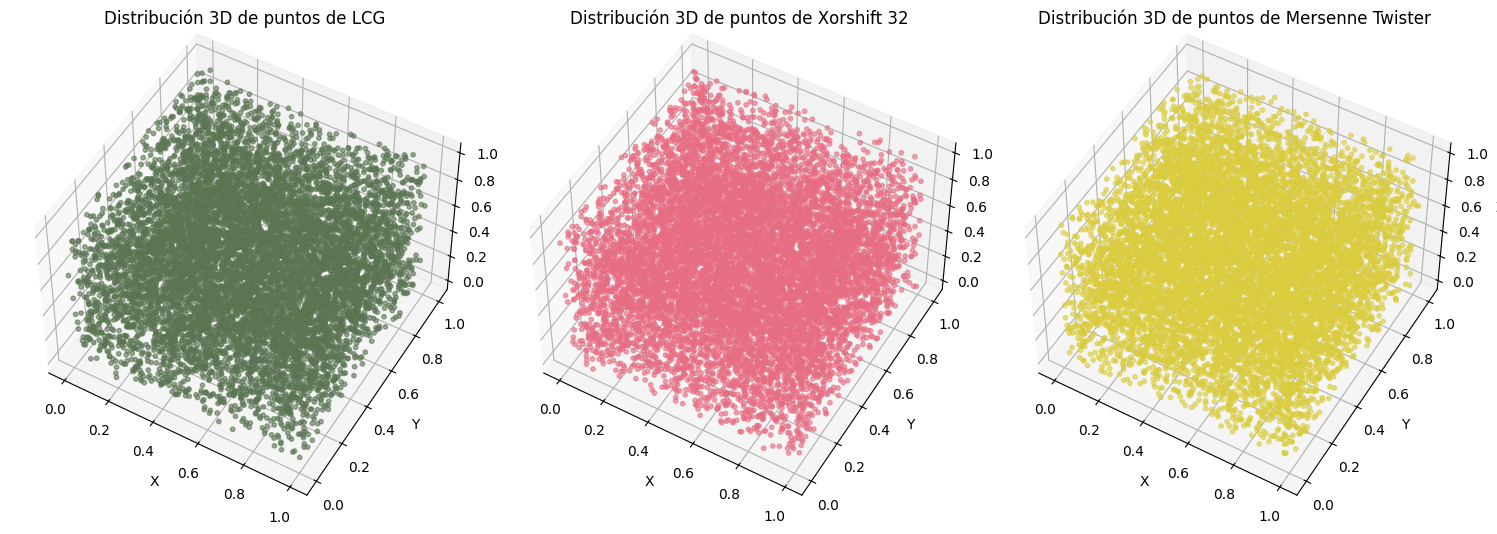

In [4]:
Plotters.plot_3D_generators(generators=[lcg, xorshift, mersenne_twister], Nsamples=SAMPLE_SIZE_SMALL)

## 👀 Estimaciones

Seguido de esto realizamos las estimaciones de la integral utilizando Monte Carlo.

### 🛒 Recolectando **10.000 muestras** de los generadores

In [5]:
dimensions = {
    TWO_DIMENSIONS: INTEGRAL_VAL_D2,
    FIVE_DIMENSIONS: INTEGRAL_VAL_D5,
    TEN_DIMENSIONS: INTEGRAL_VAL_D10
}

generators = {
    "LCG": lcg,
    "Xorshift": xorshift,
    "Mersenne Twister": mersenne_twister
}

for dim, real_val in dimensions.items():
    estimations = {}
    for name, rng in generators.items():
        estimation = Utils.rng_estimation_gaussian_in_hipercube(
            Nsamples=SAMPLE_SIZE_SMALL,
            rng=rng,
            d=dim
        )
        estimations[name] = estimation
    Printers.print_estimations_table(estimations, real_val)

------------------------------------------2 DIMENSIONES------------------------------------------
|      Generador       |   Estimación    |   Valor Real    | Error Absoluto  | Error Relativo  |
|----------------------|-----------------|-----------------|-----------------|-----------------|
|         LCG          |    0.557117     |                 |    0.000623     |    0.001118     |
|       Xorshift       |    0.561834     |    0.557740     |    0.004094     |    0.007341     |
|   Mersenne Twister   |    0.560165     |                 |    0.002425     |    0.004347     |
-------------------------------------------------------------------------------------------------

------------------------------------------5 DIMENSIONES------------------------------------------
|      Generador       |   Estimación    |   Valor Real    | Error Absoluto  | Error Relativo  |
|----------------------|-----------------|-----------------|-----------------|-----------------|
|         LCG          |  

### 🛒 Recolectando 100.000 muestras de los generadores

In [6]:
for dim, real_val in dimensions.items():
    estimations = {}
    for name, rng in generators.items():
        estimation = Utils.rng_estimation_gaussian_in_hipercube(
            Nsamples=SAMPLE_SIZE_MEDIUM,
            rng=rng,
            d=dim
        )
        estimations[name] = estimation
    Printers.print_estimations_table(estimations, real_val)

------------------------------------------2 DIMENSIONES------------------------------------------
|      Generador       |   Estimación    |   Valor Real    | Error Absoluto  | Error Relativo  |
|----------------------|-----------------|-----------------|-----------------|-----------------|
|         LCG          |    0.557207     |                 |    0.000533     |    0.000956     |
|       Xorshift       |    0.558280     |    0.557740     |    0.000540     |    0.000968     |
|   Mersenne Twister   |    0.557661     |                 |    0.000079     |    0.000142     |
-------------------------------------------------------------------------------------------------

------------------------------------------5 DIMENSIONES------------------------------------------
|      Generador       |   Estimación    |   Valor Real    | Error Absoluto  | Error Relativo  |
|----------------------|-----------------|-----------------|-----------------|-----------------|
|         LCG          |  

### 🛒 Recolectando 1.000.000 muestras de los generadores

In [7]:
for dim, real_val in dimensions.items():
    estimations = {}
    for name, rng in generators.items():
        estimation = Utils.rng_estimation_gaussian_in_hipercube(
            Nsamples=SAMPLE_SIZE_BIG,
            rng=rng,
            d=dim
        )
        estimations[name] = estimation
    Printers.print_estimations_table(estimations, real_val)

------------------------------------------2 DIMENSIONES------------------------------------------
|      Generador       |   Estimación    |   Valor Real    | Error Absoluto  | Error Relativo  |
|----------------------|-----------------|-----------------|-----------------|-----------------|
|         LCG          |    0.557541     |                 |    0.000199     |    0.000357     |
|       Xorshift       |    0.557908     |    0.557740     |    0.000168     |    0.000302     |
|   Mersenne Twister   |    0.557505     |                 |    0.000235     |    0.000421     |
-------------------------------------------------------------------------------------------------

------------------------------------------5 DIMENSIONES------------------------------------------
|      Generador       |   Estimación    |   Valor Real    | Error Absoluto  | Error Relativo  |
|----------------------|-----------------|-----------------|-----------------|-----------------|
|         LCG          |  

# 🔍 Análisis

## ⌛ Tiempo de estimación
Este análisis se realizó con una computadora con los siguientes componentes:
- AMD Ryzen 3 3200G (4) @ 3.600GH
- 16 GB de RAM
- GPU: AMD ATI Radeon Vega Serie

### 🛒 Recolectando 10.000 muestras con 100 simulaciones ↩️

------------------------------------------------------------
              100 simulaciones, 10000 muestras
------------------------------------------------------------
|    Dimensión    |      Generador       |   Tiempo (s)    |
|-----------------|----------------------|-----------------|
|                 |         LCG          |    0.471013     |
|  2 DIMENSIONES  |       Xorshift       |    0.701989     |
|                 |   MersenneTwister    |    1.810661     |
------------------------------------------------------------
|                 |         LCG          |    0.449691     |
|  5 DIMENSIONES  |       Xorshift       |    0.687349     |
|                 |   MersenneTwister    |    1.817485     |
------------------------------------------------------------
|                 |         LCG          |    0.439873     |
| 10 DIMENSIONES  |       Xorshift       |    0.695375     |
|                 |   MersenneTwister    |    1.830436     |
--------------------------------------

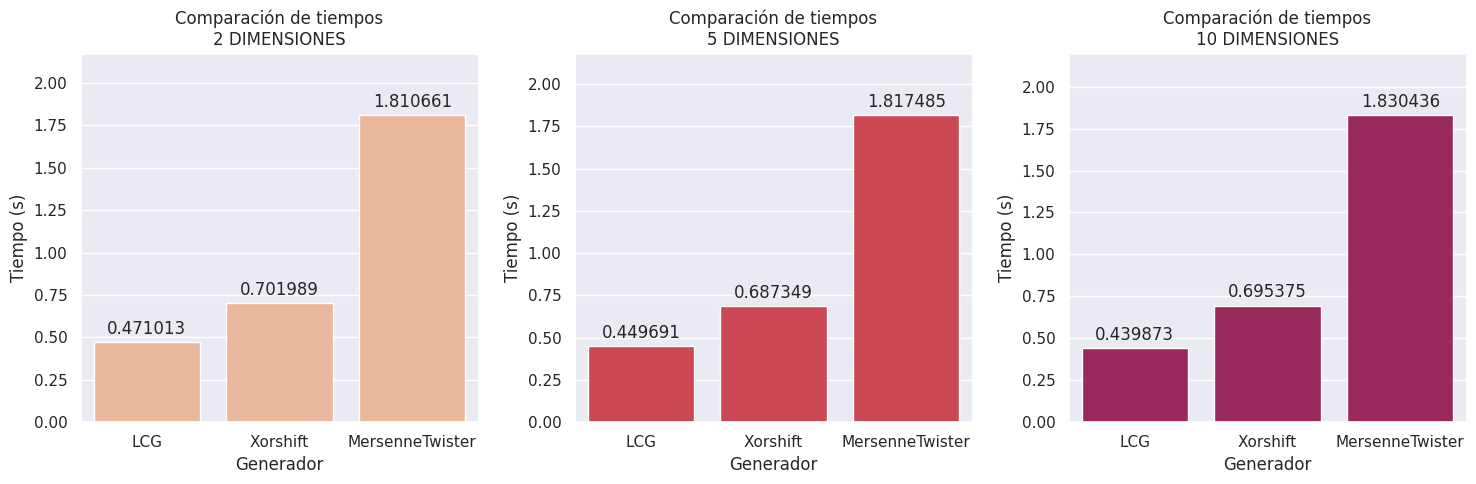

In [4]:
sample_results_d2 = Compare.time(Nsamples=SAMPLE_SIZE_SMALL, Nsim=100, seed=SEED, d=TWO_DIMENSIONS)
sample_results_d5 = Compare.time(Nsamples=SAMPLE_SIZE_SMALL, Nsim=100, seed=SEED, d=FIVE_DIMENSIONS)
sample_results_d10 = Compare.time(Nsamples=SAMPLE_SIZE_SMALL, Nsim=100, seed=SEED, d=TEN_DIMENSIONS)

dimensional_results = {
    "2 DIMENSIONES": sample_results_d2,
    "5 DIMENSIONES": sample_results_d5,
    "10 DIMENSIONES": sample_results_d10
}

Printers.print_timing_table(dimensional_results, Nsim=100, Nsamples=SAMPLE_SIZE_SMALL)
Plotters.plot_timing_table(dimensional_results)

### 🛒 Recolectando 100.000 muestras con 100 simulaciones ↩️

------------------------------------------------------------
             100 simulaciones, 100000 muestras
------------------------------------------------------------
|    Dimensión    |      Generador       |   Tiempo (s)    |
|-----------------|----------------------|-----------------|
|                 |         LCG          |    4.622759     |
|  2 DIMENSIONES  |       Xorshift       |    7.159485     |
|                 |   MersenneTwister    |    18.356101    |
------------------------------------------------------------
|                 |         LCG          |    4.345129     |
|  5 DIMENSIONES  |       Xorshift       |    6.882924     |
|                 |   MersenneTwister    |    18.293512    |
------------------------------------------------------------
|                 |         LCG          |    4.333151     |
| 10 DIMENSIONES  |       Xorshift       |    6.858238     |
|                 |   MersenneTwister    |    18.358422    |
--------------------------------------

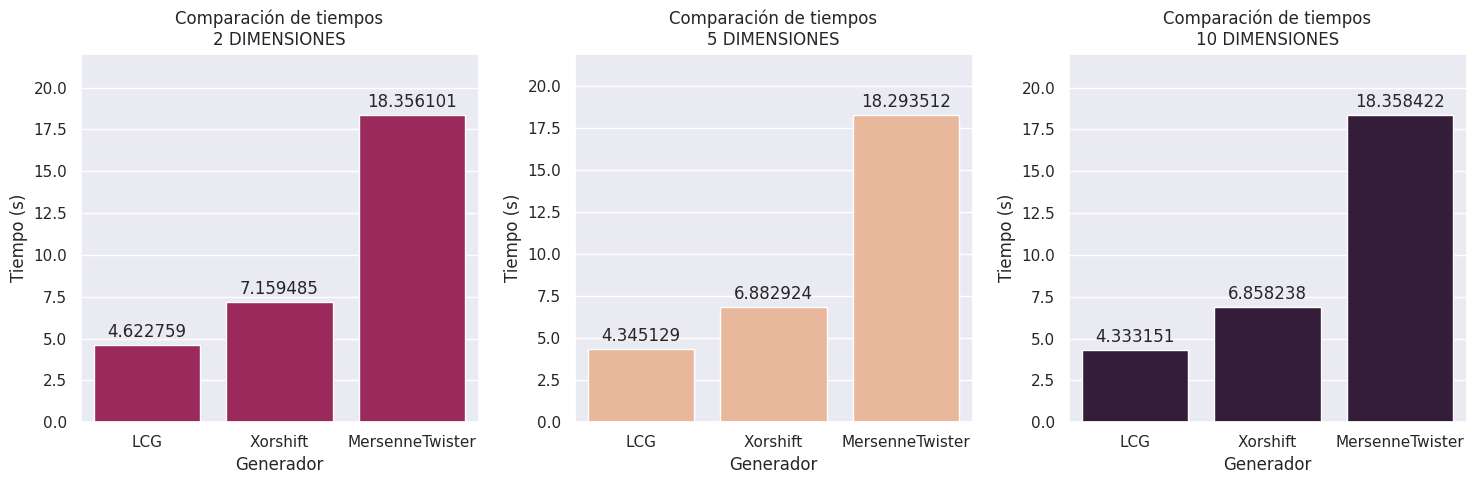

In [5]:
sample_results_d2 = Compare.time(Nsamples=SAMPLE_SIZE_MEDIUM, Nsim=100, seed=SEED, d=TWO_DIMENSIONS)
sample_results_d5 = Compare.time(Nsamples=SAMPLE_SIZE_MEDIUM, Nsim=100, seed=SEED, d=FIVE_DIMENSIONS)
sample_results_d10 = Compare.time(Nsamples=SAMPLE_SIZE_MEDIUM, Nsim=100, seed=SEED, d=TEN_DIMENSIONS)

dimensional_results = {
    "2 DIMENSIONES": sample_results_d2,
    "5 DIMENSIONES": sample_results_d5,
    "10 DIMENSIONES": sample_results_d10
}

Printers.print_timing_table(dimensional_results, Nsim=100, Nsamples=SAMPLE_SIZE_MEDIUM)
Plotters.plot_timing_table(dimensional_results)

### 🛒 Recolectando 1.000.000 muestras con 100 simulaciones ↩️

------------------------------------------------------------
             100 simulaciones, 1000000 muestras
------------------------------------------------------------
|    Dimensión    |      Generador       |   Tiempo (s)    |
|-----------------|----------------------|-----------------|
|                 |         LCG          |    46.252305    |
|  2 DIMENSIONES  |       Xorshift       |    68.570223    |
|                 |   MersenneTwister    |   185.357793    |
------------------------------------------------------------
|                 |         LCG          |    43.252773    |
|  5 DIMENSIONES  |       Xorshift       |    68.802159    |
|                 |   MersenneTwister    |   185.643554    |
------------------------------------------------------------
|                 |         LCG          |    44.023819    |
| 10 DIMENSIONES  |       Xorshift       |    69.067045    |
|                 |   MersenneTwister    |   185.276693    |
-------------------------------------

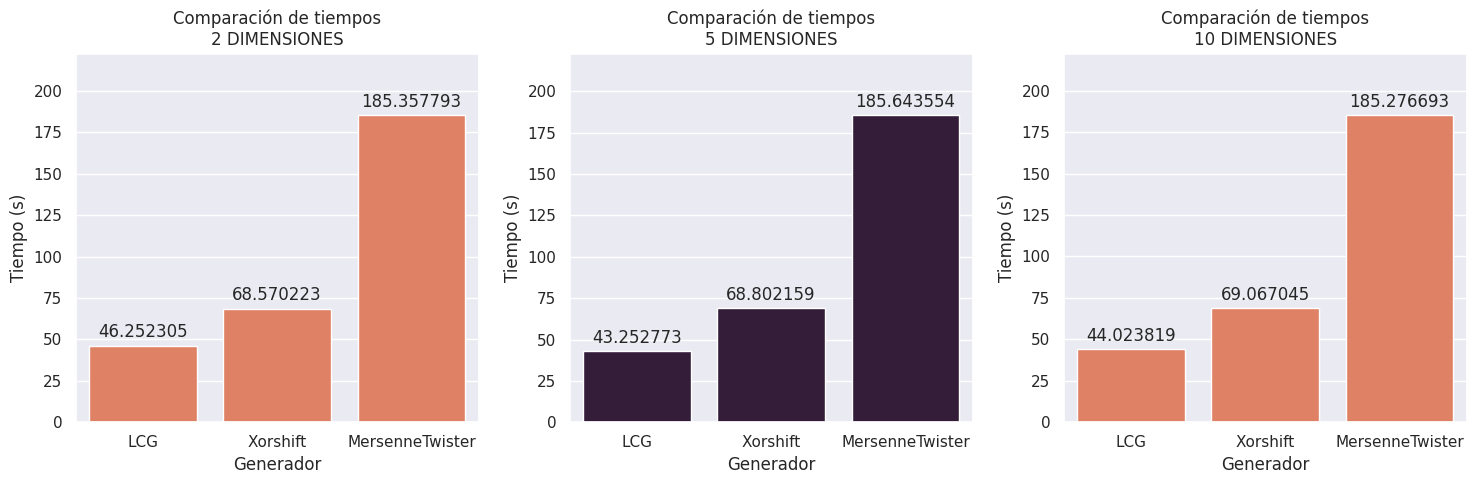

In [7]:
sample_results_d2 = Compare.time(Nsamples=SAMPLE_SIZE_BIG, Nsim=100, seed=SEED, d=TWO_DIMENSIONS)
sample_results_d5 = Compare.time(Nsamples=SAMPLE_SIZE_BIG, Nsim=100, seed=SEED, d=FIVE_DIMENSIONS)
sample_results_d10 = Compare.time(Nsamples=SAMPLE_SIZE_BIG, Nsim=100, seed=SEED, d=TEN_DIMENSIONS)

dimensional_results = {
    "2 DIMENSIONES": sample_results_d2,
    "5 DIMENSIONES": sample_results_d5,
    "10 DIMENSIONES": sample_results_d10
}

Printers.print_timing_table(dimensional_results, Nsim=100, Nsamples=SAMPLE_SIZE_BIG)
Plotters.plot_timing_table(dimensional_results)

In [14]:
sample_results = Compare.muestral_stats(Nsamples=SAMPLE_SIZE_SMALL, Nsim=100, seed=12345678, d=2)
print(f"{sample_results["LCG"][1]:.6f}")
print(f"{sample_results["Xorshift"][1]:.6f}")
print(f"{sample_results['MersenneTwister'][1]:.6f}")

0.000007
0.000009
0.000007


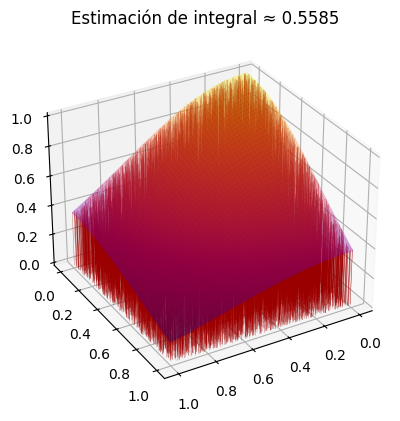

In [7]:
Plotters.plot_3D_gaussian_estimation(Nsamples=SAMPLE_SIZE_SMALL, rng=lcg)

In [9]:
print(f"Pasa xorshift KS?: {Test.test_Kolmogorov_Smirnov(rng=xorshift, Nsamples=1000, Nsim=10000)}")
print(f"Pasa lcg KS?: {Test.test_Kolmogorov_Smirnov(rng=lcg, Nsamples=1000, Nsim=10000)}")
print(f"Pasa mt KS?: {Test.test_Kolmogorov_Smirnov(rng=mersenne_twister, Nsamples=1000, Nsim=10000)}")

Pasa xorshift KS?: True
Pasa lcg KS?: True
Pasa mt KS?: True
